# Lista 7

### Zaimplementowane biblioteki

In [18]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample

### Zadanie 1

In [129]:
def autocov(xs, h=10):
    n = len(xs)
    autoc = 0
    xsMean = np.mean(xs)
    for i in range(n-h):
        autoc += (xs[i]-xsMean)*(xs[i+h]-xsMean)
    return autoc/n

def yw(data, p):
    gamma = np.zeros((p,1))
    for i in range(p):
        gamma[i][0] = (autocov(data, i+1))
    sigmaR = np.zeros((p,p))
    gammaWZ = np.zeros((p+1,1))
    for i in range(p+1):
        gammaWZ[i][0] = (autocov(data, i))
    for i in range(0, p):
        for j in range(0, p):
            sigmaR[i][j] = gammaWZ[np.abs(i-j)][0]
    theta = np.linalg.inv(sigmaR)@gamma
    sigma = autocov(data, 0) - theta.T@gamma
    return theta, sigma
theta1s = []
theta2s = []
sigmas = []
for i in range(500):
    xs = arma_generate_sample(ar = np.r_[1, -0.2, -0.4], ma=np.r_[1] , nsample=1000, scale = np.sqrt(0.5))
    theta, sigma = yw(xs, 2)
    theta1s.append(theta[0][0])
    theta2s.append(theta[1][0])
    sigmas.append(sigma[0][0])


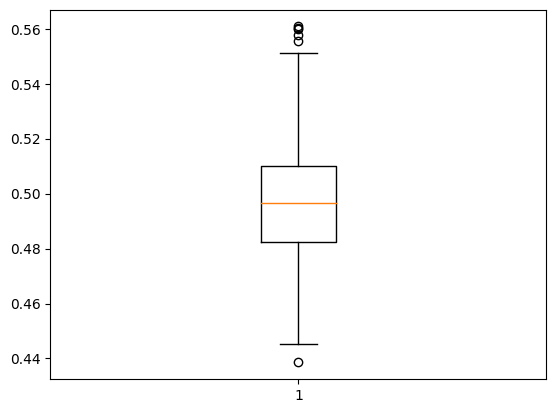

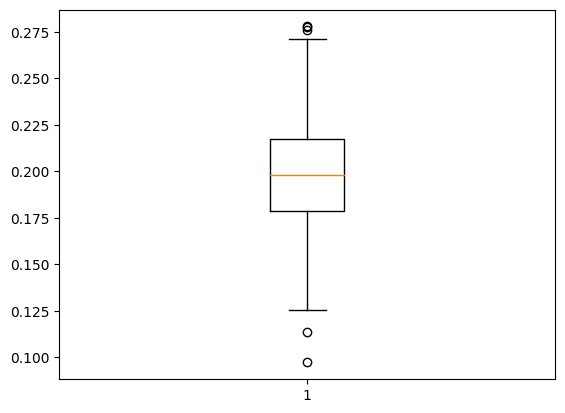

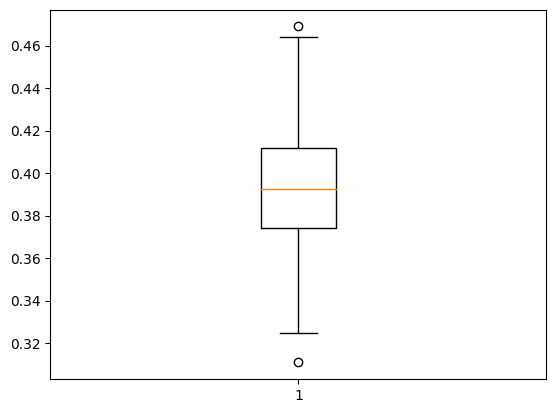

In [130]:
plt.boxplot(sigmas)
plt.show()
plt.boxplot(theta1s)
plt.show()
plt.boxplot(theta2s)
plt.show()


### Zadanie 2

In [126]:
theta1s = []
sigmas = []
for i in range(500):
    xs = arma_generate_sample(ar = np.r_[1, -0.2 ], ma=np.r_[1] , nsample=1000, scale = np.sqrt(0.5))
    theta, sigma = yw(xs, 1)
    theta1s.append(theta[0][0])
    sigmas.append(sigma[0][0])

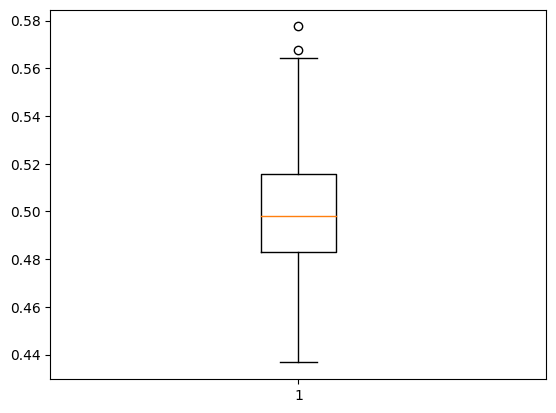

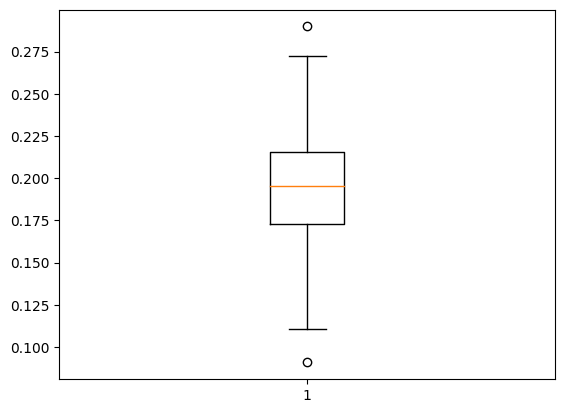

In [127]:
plt.boxplot(sigmas)
plt.show()
plt.boxplot(theta1s)
plt.show()